In [2]:
from keras.applications.vgg16 import VGG16

In [3]:
model_vgg16_conv = VGG16(weights='imagenet', include_top=True)
model_vgg16_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [1]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.imagenet_utils import  preprocess_input
import numpy as np
import glob
import pickle
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib import pyplot as plt
%matplotlib inline
from keras.models import Sequential
import pandas as pd
import os
import shutil
from sklearn import model_selection
from keras.preprocessing.image import ImageDataGenerator
from sklearn.cluster import DBSCAN
from shutil import copyfile

Using TensorFlow backend.


In [4]:
inp = model_vgg16_conv.input
out = model_vgg16_conv.layers[-2].output

model = Model(inp ,out)

In [25]:
pic_list = glob.glob('data/data/data_clustering/*.JPG')

In [40]:
features_list = []
i=0
for pic_path in pic_list:
    img = load_img(pic_path, target_size=(224, 224))
    x = img_to_array(img)  
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features_list.append(model.predict(x))
    if i%50==0:
        print(i)
    i+=1

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400


In [41]:
with open('pic_list.pkl', 'wb') as f:
    pickle.dump(pic_list, f)

In [42]:
with open('features_list_VGG16.pkl', 'wb') as f:
    pickle.dump(features_list, f)

In [49]:
len(pic_lists)

4434

### import data pickle

In [46]:
with open('features_list_VGG16.pkl', 'rb') as f:
    features_list = pickle.load(f)

In [47]:
with open('pic_list.pkl', 'rb') as f:
    pic_list = pickle.load(f)

In [52]:
len(features_list)

4434

In [50]:
nb_image = len(pic_list)
nb_features = model_vgg16_conv.layers[-2].get_config()['units']

In [51]:
features_list = np.asarray(features_list).reshape(nb_image, nb_features)

In [53]:
dist_eucl = pairwise_distances(features_list, metric = "euclidean")
dist_cos = pairwise_distances(features_list, metric = "cosine")

In [10]:
def search_image_euc(i):
    distance_i = dist_eucl[i, :]
    ind_min_1 = np.argsort(distance_i)[1]
    ind_min_2 = np.argsort(distance_i)[2]
    ind_min_3 = np.argsort(distance_i)[3]
    ind_min_4 = np.argsort(distance_i)[4]
    f, ax = plt.subplots(1, 5,figsize=(16,10))
    ax[0].imshow(load_img(pic_list[i]))
    ax[1].imshow(load_img(pic_list[ind_min_1]))
    ax[2].imshow(load_img(pic_list[ind_min_2]))
    ax[3].imshow(load_img(pic_list[ind_min_3]))
    ax[4].imshow(load_img(pic_list[ind_min_4]))
    print(np.sort(distance_i)[:5])
    

[  0.          54.3420105   56.62010193  57.34701157  58.41957855]
[  0.          41.46510315  49.25669098  50.15457153  50.22770309]
[  0.          39.48171997  39.51903915  39.60559464  39.810009  ]
[  0.          50.96216202  57.47140884  61.01102066  62.60682297]
[  0.          62.90898132  68.27735901  69.40401459  72.45012665]
[  0.          64.10681152  65.34052277  65.97061157  71.21231079]
[  0.          52.3957634   52.50205231  53.54711533  54.59395599]
[  0.          60.40045547  61.25743866  62.32373047  62.83321762]
[  0.          52.63874817  54.18113708  59.17338562  59.62836075]
[  0.          47.64542007  53.8919754   54.05144119  56.39726257]
[  0.          41.90225983  46.01017761  49.13057709  51.44379044]
[  0.          66.14962769  66.58827972  67.30719757  67.44535828]
[  0.          46.58699036  47.82146454  48.82431412  49.7709465 ]
[  0.          51.67963409  53.06149292  53.70686722  54.2783165 ]
[  0.          50.4091568   55.23441696  55.31404877  55.46128

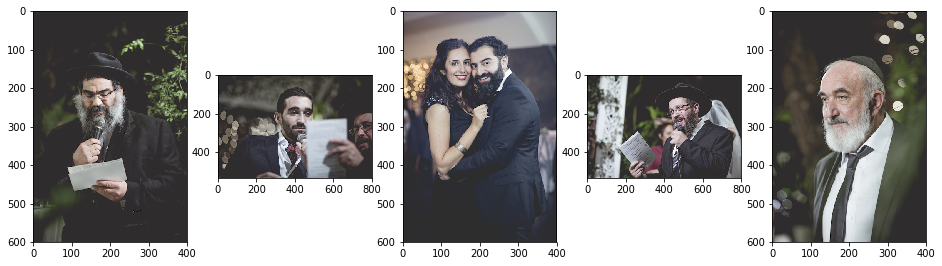

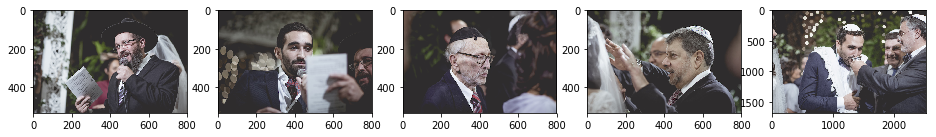

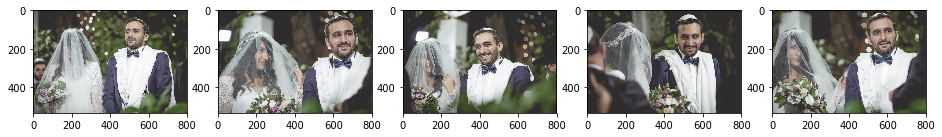

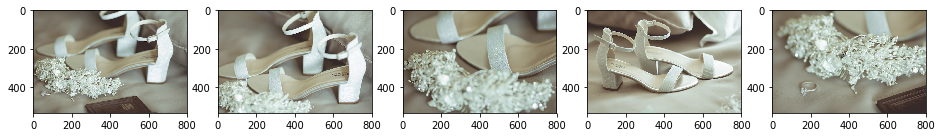

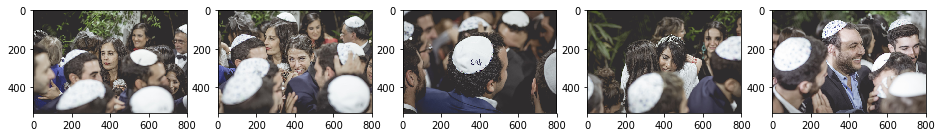

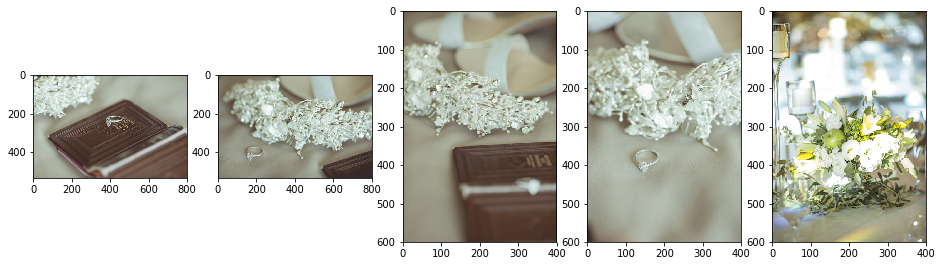

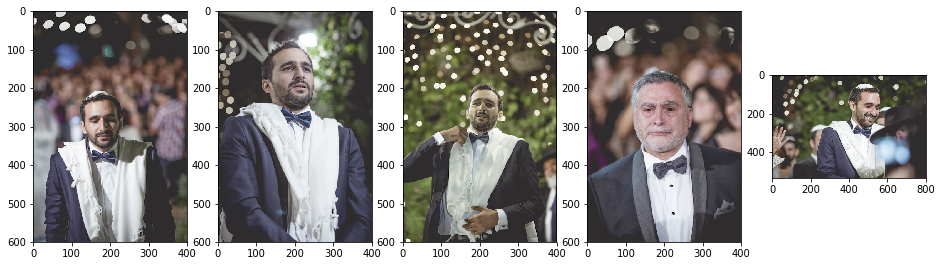

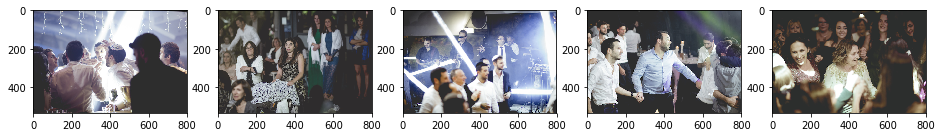

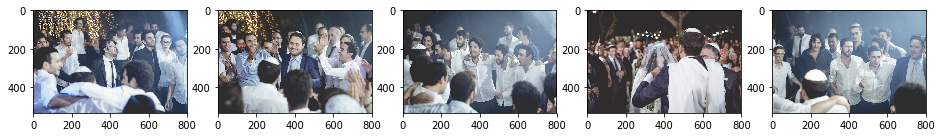

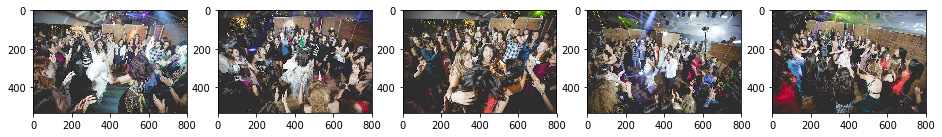

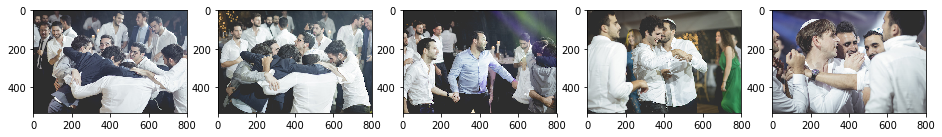

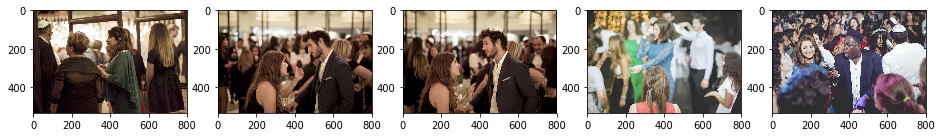

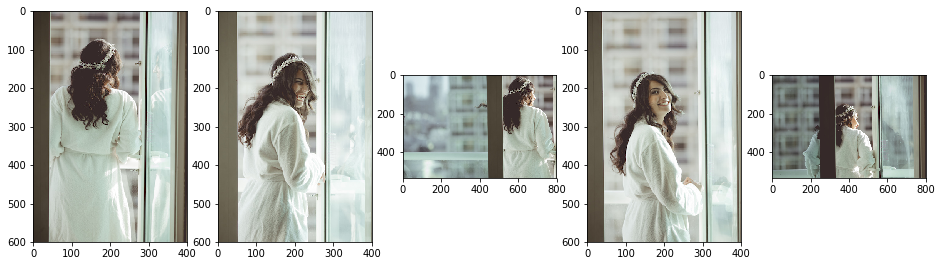

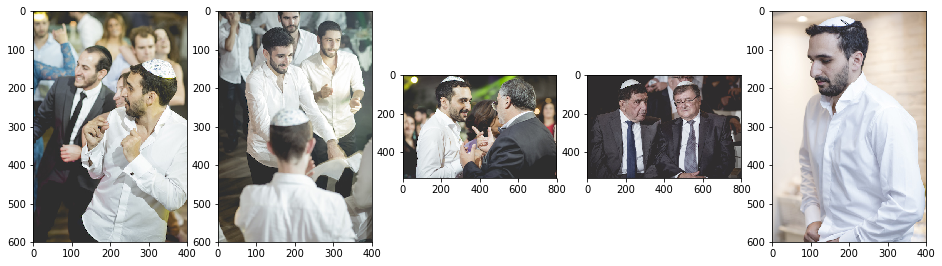

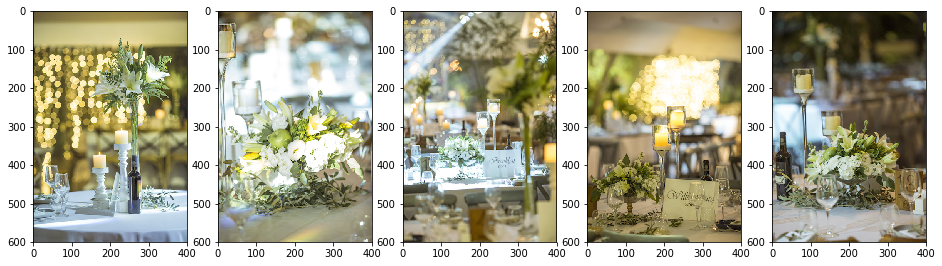

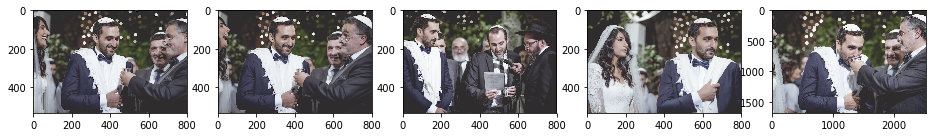

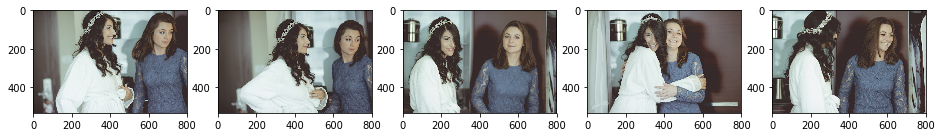

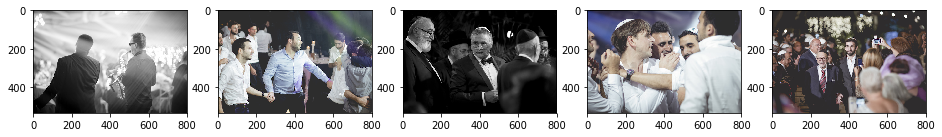

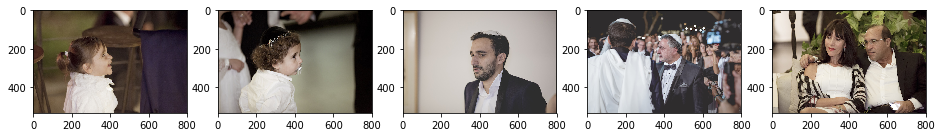

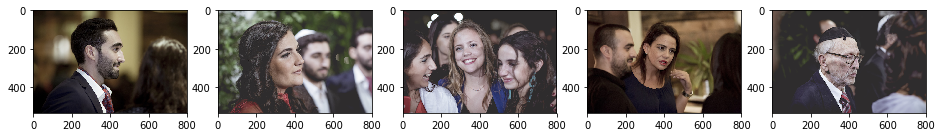

In [24]:
for i in range(80, 100):
    search_image_euc(i)

# DBSCAN

### model

In [54]:
import numpy
numpy.set_printoptions(threshold=numpy.nan)

In [70]:
model_DBSCAN = DBSCAN(eps=120 , min_samples=3)

In [71]:
#Array with the cluster number for each image
labels = model_DBSCAN.fit_predict(dist_eucl)

In [72]:
np.unique(labels).shape

(74,)

In [73]:
#Number of cluster excepting
nb_clusters = len(set(labels)) - (1 if -1 in labels else 0)
nb_clusters

73

In [74]:
nb_element_clustered =  labels[labels != -1].shape[0]

In [75]:
number_element_per_cluster = int(nb_element_clustered / nb_clusters)

In [76]:
labels[labels == -1].shape

(4147,)

### Statistics

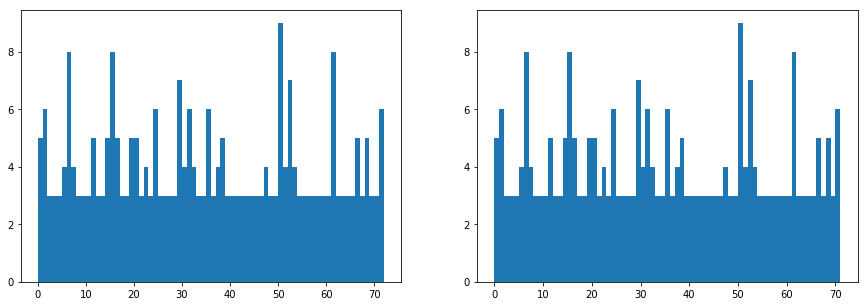

In [77]:
labels_only_clustered = labels[labels != -1]
f, axe = plt.subplots(1,2,figsize=(15,5))
axe[0].hist(labels, bins=range(nb_clusters))
axe[1].hist(labels_only_clustered, bins=range(nb_clusters - 1));

In [78]:
print('% Number of element no clustered: ', (labels==-1).sum()/nb_image)
print('# clusters:', nb_clusters)
print('Average of number in cluster:', nb_element_clustered)
print('Average number of element per cluster:', number_element_per_cluster)

% Number of element no clustered:  0.935272891295
# clusters: 73
Average of number in cluster: 287
Average number of element per cluster: 3


In [ ]:
for index in set(0, labels.max()):
    plot(index)
    

In [67]:
def plot_cluster(no_cluster):
    indice = np.argwhere(labels==no_cluster)
    indice = indice.reshape(indice.shape[0]).tolist()
    nb_image = len(indice)
    f, ax = plt.subplots(1, nb_image, figsize=(120,10))
    i=0
    for image_ind in indice:
        ax[i].imshow(load_img(pic_list[image_ind]))
        i+=1
   

In [68]:
def plot_all():
    for no_cluster in range(nb_clusters):
        print('Cluster no:', no_cluster)
        plot_cluster(no_cluster)

In [65]:
def create_folder_one(no_cluster, path):
    path_name = path + '/cluster_' + str(no_cluster)
    if not os.path.exists(path_name):
        os.makedirs(path_name)
    indice = np.argwhere(labels==no_cluster)
    indice = indice.reshape(indice.shape[0]).tolist()
    nb_image = len(indice) 
    for image_ind in indice:
        name_image = pic_list[image_ind].split('/')[-1]
        src = pic_list[image_ind]
        des = path_name + '/' + name_image
        copyfile(src, des)
        
    

In [66]:
def create_folder_all():
    for no_cluster in range(nb_clusters):
        create_folder_one(no_cluster , './data/data_clustered')
    

In [79]:
create_folder_all()

In [54]:
create_folder_one(2, './data/data_clustered')

In [65]:
estelle_relou = pd.DataFrame(columns=['path', 'cluster'], index=range(len(labels)))
estelle_relou['path'] = pic_list
estelle_relou['cluster'] = labels
estelle_relou.to_csv('./estelle_relou')